## Document Analysis: Computational Methods - Summer Term 2025
### Lectures: Jun.-Prof. Dr. Andreas Spitz
### Tutorials: Julian Schelb

# Exercise 05

### You will learn about:

- Text Similarity
- Levenshtein (Edit) Distance
- TF-IDF Vectors and Cosine Similarity

---


## Task 1 - Levenshtein (Edit) Distance (pen and paper):

### Part 1:
Calculate the Levenshtein distance between words 
- "signed" and "sealed"

Fill out the edit distance table like it is shown on the lecture slides.

<img src="NBMetadataCache.png" alt="Levenshtein" width="400"/>

---

### Part 2: 
What is the advantage and disadvantage of this method for measuring word similarity?

Advantage: dynamic programming, stores best results and keep only those, not all.
Disadvantage: all exchagnes have same costs. Some might happen easier than others. Different costs for replace/insert/delete. 
-> f.e. Damerau modifications.

---

## Task 2 - Text Similarity:

### Part 1:
Your task is to calculate pair-wise Cosine similarities 
between the first 1000 sentences of the 'debates' dataset. 
Calculate the similarities on sentence TF-IDF vectors. Plot the similarity values in a heatmap visualization. 

- Calculate the Cosine similarity and visualize the results without cleaning the data.
- Calculate the Cosine similarity and visualize the results after cleaning the data (think of appropriate methods for data cleaning).

In [3]:
# you can use the given libraries or choose different ones for the similarity calculation
# use plotly library to create a heatmap visualization
import json
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
import plotly.express as px
#plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import re


In [4]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /Users/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/anna/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
# read debates
with open('data/texts.json', 'r') as infile:
    data = json.load(infile)

content_debates = data['debates'];

Cosine Similarity Entry Example:
 [1.         0.         0.         0.         0.         0.
 0.         0.         0.05740918 0.         0.01947938 0.
 0.         0.11406347 0.         0.         0.11362628 0.
 0.         0.         0.02969876 0.04195798 0.         0.
 0.16177145 0.01859637 0.         0.         0.14582937 0.04538485
 0.03625427 0.10627309 0.         0.         0.         0.02074822
 0.         0.05172796 0.         0.         0.         0.
 0.06211756 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02479441 0.02489915 0.12883906 0.         0.         0.08339684
 0.01884335 0.01573501 0.         0.         0.         0.
 0.         0.         0.         0.         0.13624349 0.06034191
 0.02509087 0.         0.         0.         0.         0.0437479
 0.         0.         0.         0.         0.         0.12606686
 0.         0.04882005 0.         0.         0.         0.
 0.         0.         0.03584362 

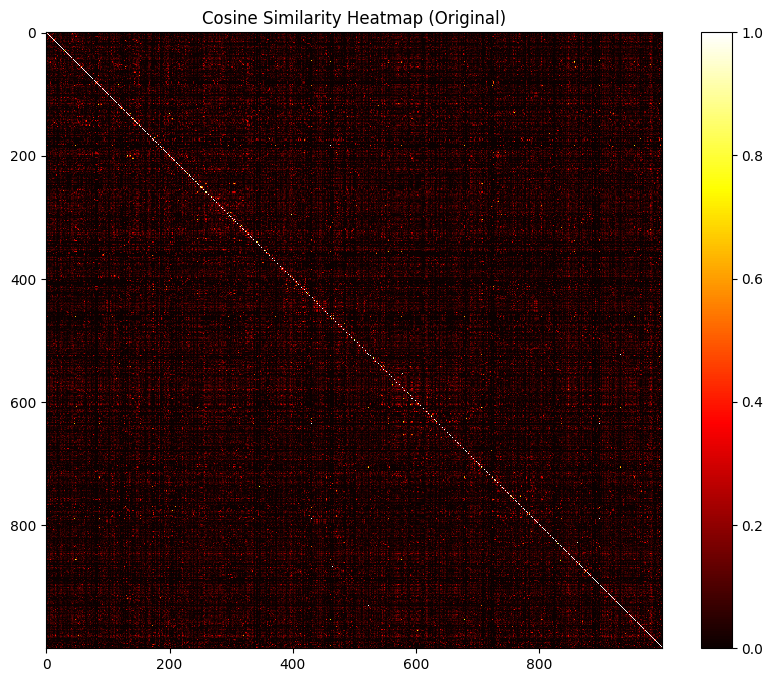

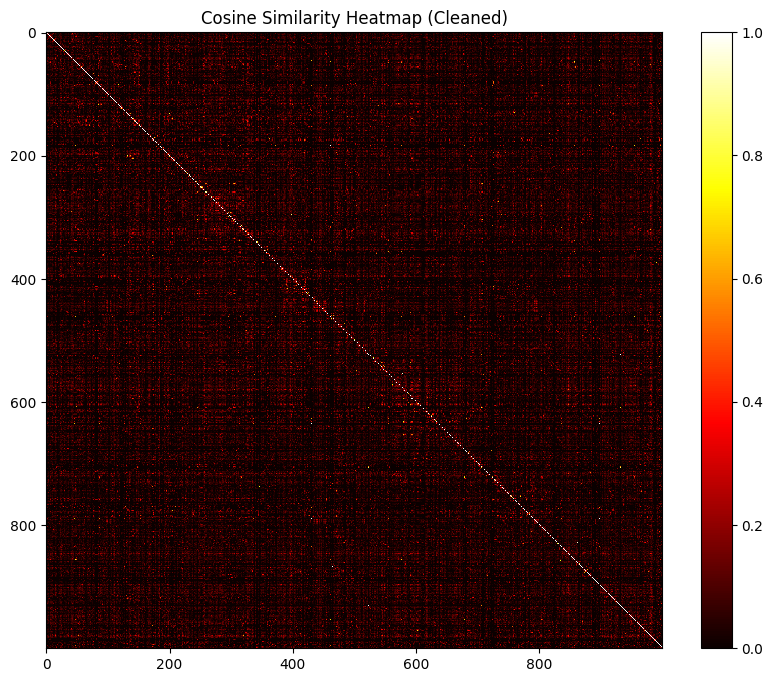

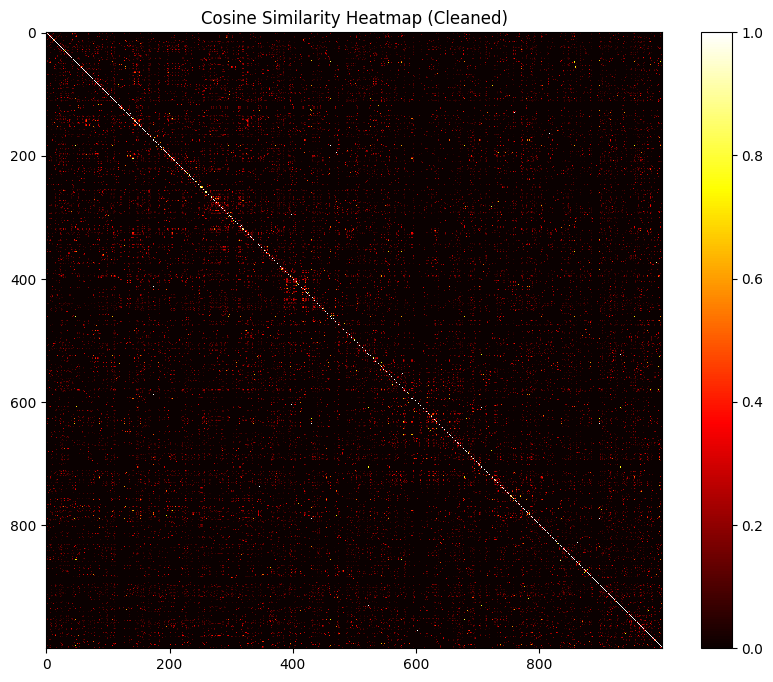

In [14]:
# TODO - ADD YOUR CODE HERE
content_debates = data['debates']
sentences = sent_tokenize(content_debates)[:1000]

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Calculate similarity for original sentences
tfidf_matrix = vectorizer.fit_transform(sentences)
cosine_sim = cosine_similarity(tfidf_matrix)
print(f"Cosine Similarity Entry Example:\n {cosine_sim[0]}\n")

# Heatmap plot for original sentences
plt.figure(figsize=(10, 8))
plt.imshow(cosine_sim, cmap='hot', interpolation='nearest')
plt.title("Cosine Similarity Heatmap (Original)")
plt.colorbar()
plt.show()

# Cleaning function
stopword = set(stopwords.words('english'))
punctuation = set(string.punctuation)
snowball_stemmer = SnowballStemmer('english')

def clean_sentence_2(sent, min_len=3):
    
    # Remove special characters (keep basic punctuation)
    sent = re.sub(r'[^\w\s.,!?]', '', sent)
    
    # Tokenize
    tokens = nltk.word_tokenize(sent)
    
    # Lowercase + cleaning
    cleaned_tokens = []
    for word in tokens:
        word = word.lower().strip()
        cleaned_tokens.append(word)
    
    # Stemming
    stemmed_tokens = [snowball_stemmer.stem(word) for word in cleaned_tokens]
    
    return ' '.join(stemmed_tokens)

# Clean sentences
sentences_clean_2 = [clean_sentence_2(sent) for sent in sentences]

# Calculate similarity for cleaned sentences
tfidf_clean_2 = vectorizer.fit_transform(sentences_clean_2)
cosine_clean_2 = cosine_similarity(tfidf_clean_2)

# Simple heatmap plot for cleaned sentences
plt.figure(figsize=(10, 8))
plt.imshow(cosine_clean_2, cmap='hot', interpolation='nearest')
plt.title("Cosine Similarity Heatmap (Cleaned)")
plt.colorbar()
plt.show()

def clean_sentence(sent, min_len=3):
    
    # Remove special characters (keep basic punctuation)
    sent = re.sub(r'[^\w\s.,!?]', '', sent)
    
    # Tokenize
    tokens = nltk.word_tokenize(sent)
    
    # Lowercase + cleaning
    cleaned_tokens = []
    for word in tokens:
        word = word.lower().strip()
        if (len(word) >= min_len and 
            word not in stopword and 
            word not in punctuation and
            not word.isnumeric()):
            cleaned_tokens.append(word)
    
    # Stemming
    stemmed_tokens = [snowball_stemmer.stem(word) for word in cleaned_tokens]
    
    return ' '.join(stemmed_tokens)

# Clean sentences
sentences_clean = [clean_sentence(sent) for sent in sentences]

# Calculate similarity for cleaned sentences
tfidf_clean = vectorizer.fit_transform(sentences_clean)
cosine_clean = cosine_similarity(tfidf_clean)

# Simple heatmap plot for cleaned sentences
plt.figure(figsize=(10, 8))
plt.imshow(cosine_clean, cmap='hot', interpolation='nearest')
plt.title("Cosine Similarity Heatmap (Cleaned)")
plt.colorbar()
plt.show()


In [14]:
# Create DataFrame for cleaned sentences similarity
#df_clean = pd.DataFrame(cosine_clean,
#                       index=[f"Sent {i}" for i in range(len(sentences_clean))],
#                       columns=[f"Sent {i}" for i in range(len(sentences_clean))])

# Plot heatmap for cleaned sentences
#fig2 = px.imshow(df_clean,
#                labels=dict(x="Sentence Index", y="Sentence Index", color="Cosine Similarity"),
#                title="Cosine Similarity Heatmap (Cleaned)",
#                color_continuous_scale='viridis')
#fig2.update_layout(width=800, height=700)
#fig2.show()

The first sentence is perfectly similar to itself (1.0 on the diagonal).
Most other sentences have zero or near-zero similarity with the first sentence, which is expected when many sentences share few words.
Some sentences have small similarity scores (0.0287, 0.0405), meaning some overlap.
Zero similarity happens if two sentences share no common words after TF-IDF vectorization.
With 1000+ sentences, many sentences will be unrelated, so most cosine values are near zero.
The diagonal is always 1 (sentence compared to itself).

---

#### Part 2:

- Interpret the results. What kind of insights can you gain from the heatmap visualizations?

- How does data cleaning influence the similarity results? 

Sentences are moderately similar and thus seem to be on a similar topic.
Sentences that follow one another are slightly more similar to each other than sentences overall.

Actually with my cleaning I have reduced similarity between sentences. 
This is probably because I removed stopwords and now the counts of the tf-idf are off? 

When only removing special characters and stemming, we find some more similarities than with the uncleaned text.

---

## Task 3 - Search Engine:

### Part 1:
Read the critics for the first 200 movies from the 'rottentomatoes' dataset. 
First, create a document for each movie by concatenating their critic entries. 
Remove stop words, and compute TF-IDF vectors for each document.

In [5]:
# TODO - ADD YOUR CODE HERE



### Part 2:
Write a function for querying the data. 
Given a set of input terms as parameter, the function should remove stop words in the input, 
compute a TF-IDF vector of the query, and match it to all stored document vectors by using Cosine similarity. 
Rank all documents by Cosine similarity to the query and output the 10 most similar documents to the query.


In [6]:
# TODO - ADD YOUR CODE HERE


### Part 3:
Run a few queries on the data. Discuss the types of errors that your search engine is making.

<font color='ff000000'>\# TEXT SUBMISSION ANSWER HERE (Double click to edit) </font>

#### Submitting your results:

To submit your results, please:

- save this file, i.e., `ex??_assignment.ipynb`.
- if you reference any external files (e.g., images), please create a zip or rar archieve and put the notebook files and all referenced files in there.
- login to ILIAS and submit the `*.ipynb` or archive for the corresponding assignment.

**Remarks:**
    
- Do not copy any code from the Internet. In case you want to use publicly available code, please, add the reference to the respective code snippet.
- Check your code compiles and executes, even after you have restarted the Kernel.
- Submit your written solutions and the coding exercises within the provided spaces and not otherwise.
- Write the names of your partner and your name in the top section.